Import library

In [1]:
import cv2
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import os

You can cut video here or cut by other web and app

In [2]:
# video_path_input = '/content/drive/MyDrive/Colab Notebooks/video/video1.mp4'
# video_path_ouput = '/content/drive/MyDrive/Colab Notebooks/video_cut/data2.mp4'
# start_time = 1109.2  # 18:29.2
# end_time = 1600.7    # 26:40.7

In [3]:

# # cut video
# cap = cv2.VideoCapture(video_path_input)
# fps = int(cap.get(cv2.CAP_PROP_FPS))
# width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
# height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
# fourcc = cv2.VideoWriter_fourcc(*'mp4v')

# out = cv2.VideoWriter(video_path_ouput, fourcc, fps, (width, height))

# frame_count = 0

# while cap.isOpened():
#     ret, frame = cap.read()
#     if not ret:
#         break

#     # Tính toán thời gian của frame hiện tại
#     current_time = frame_count / fps

#     if start_time <= current_time <= end_time:
#         out.write(frame)  # Ghi frame vào video mới

#     frame_count += 1

# cap.release()
# out.release()

# print("Video đã được cắt và lưu thành công tại:", video_path_ouput)

+ read each frame from video data.mp4(640 x 360)
    + cut each imgae [95: 296, 205: 306] (201 x 101)
    + create grid 20 x 10 with each block has dim = (9 x 9) and space = 10
    + covert each block in frame to matrix 20 x 10:
        + coordinates one block:
            - y = 1 + 10 x cnt_y
            - x = 1 + 10 x cnt_x
            * example:
              - cnt_y = 0, cnt_x = 0 => y = 1, x = 1
              - cnt_y = 1, cnt_x = 0 => y = 11, x = 1

In [4]:
# idea !!
"""
    + read each frame from video data.mp4(640 x 360)
    + cut each imgae [95: 296, 205: 306] (201 x 101)
    + create grid 20 x 10 with each block has dim = (9 x 9) and space = 10
    + covert each block in frame to matrix 20 x 10:
        + coordinates one block:
            - y = 1 + 10 x cnt_y
            - x = 1 + 10 x cnt_x
            * example: - cnt_y = 0, cnt_x = 0 => y = 1, x = 1
                       - cnt_y = 1, cnt_x = 0 => y = 11, x = 1
"""
def is_block(y, x, frame, threshold):
    count_pixel_color = 0
    for i in range(9):
        for j in range(9):
            if frame[y + i, x + j] > threshold:
                count_pixel_color += 1
    # print("check: ", count_pixel_color)
    if count_pixel_color / (9 * 9) >= 0.7:
        return True
    else:
        return False
def generate_binary_matrix(frame, threshold=20):
    binary_matrix = np.zeros((20, 10), dtype=int)
    for cnt_y in range(20):
        for cnt_x in range(10):
            if is_block(1 + 10 * cnt_y, 1 + 10 * cnt_x, frame, threshold):
                binary_matrix[cnt_y, cnt_x] = 1
    return binary_matrix
# count block => state changed
def count_block_matrix(binary_matrix):
  count_blocks = 0
  for i in range(len(binary_matrix)):
    for j in range(len(binary_matrix[0])):
      if binary_matrix[i, j] != 0:
        count_blocks += 1
  return count_blocks
# we track changed binary_matrix
"""
  if count[i - 1] == count[i] => no new block and continue
  if count[i - 1] > count[i] => has line cleared
  if count[i - 1] < count[i] => has new block
"""

'\n  if count[i - 1] == count[i] => no new block and continue\n  if count[i - 1] > count[i] => has line cleared\n  if count[i - 1] < count[i] => has new block\n'

Read each frame from each video

In [5]:
video_paths = [
              '/content/drive/MyDrive/Colab Notebooks/video_cut/data1.mp4',
              '/content/drive/MyDrive/Colab Notebooks/video_cut/data2.mp4',
              '/content/drive/MyDrive/Colab Notebooks/video_cut/data3.mp4',
              '/content/drive/MyDrive/Colab Notebooks/video_cut/data4.mp4',
              '/content/drive/MyDrive/Colab Notebooks/video_cut/data5.mp4',
              '/content/drive/MyDrive/Colab Notebooks/video_cut/data6.mp4',
              '/content/drive/MyDrive/Colab Notebooks/video_cut/data7.mp4',
              '/content/drive/MyDrive/Colab Notebooks/video_cut/data8.mp4',
              '/content/drive/MyDrive/Colab Notebooks/video_cut/data9.mp4',
              '/content/drive/MyDrive/Colab Notebooks/video_cut/data10.mp4',
              '/content/drive/MyDrive/Colab Notebooks/video_cut/data11.mp4',
              '/content/drive/MyDrive/Colab Notebooks/video_cut/data12.mp4',
              '/content/drive/MyDrive/Colab Notebooks/video_cut/data13.mp4',
              '/content/drive/MyDrive/Colab Notebooks/video_cut/data14.mp4',
              '/content/drive/MyDrive/Colab Notebooks/video_cut/data15.mp4',
              '/content/drive/MyDrive/Colab Notebooks/video_cut/data16.mp4',
              '/content/drive/MyDrive/Colab Notebooks/video_cut/data17.mp4',
              '/content/drive/MyDrive/Colab Notebooks/video_cut/data18.mp4',
              '/content/drive/MyDrive/Colab Notebooks/video_cut/data19.mp4',
              '/content/drive/MyDrive/Colab Notebooks/video_cut/data20.mp4',
              '/content/drive/MyDrive/Colab Notebooks/video_cut/data21.mp4',
              '/content/drive/MyDrive/Colab Notebooks/video_cut/data22.mp4',
              '/content/drive/MyDrive/Colab Notebooks/video_cut/data23.mp4',
              '/content/drive/MyDrive/Colab Notebooks/video_cut/data24.mp4',
              '/content/drive/MyDrive/Colab Notebooks/video_cut/data25.mp4',
              '/content/drive/MyDrive/Colab Notebooks/video_cut/data26.mp4'
              ]
all_data_images = []
all_data_images_friend = []
index_video_cut = 0
for i in range(index_video_cut, index_video_cut + 1):
  cap = cv2.VideoCapture(video_paths[i])
  if not cap.isOpened():
      print("Error: Could not open video.")
  else:
      frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
      print(f'Total number of frames: {frame_count}')
      # read each frame
      count_cap = 0
      count_frame = 600
      while True:
          count_cap += 1
          ret, frame = cap.read()
          if not ret:
              break
          frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
          # if count_cap < 518: continue
          cut_left1 = 95
          cut_left2 = 296
          cut_right1 = 205
          cut_right2 = 306
          diff = 129
          # fig, axs = plt.subplots(1, 8, figsize=(18, 18))
          # axs[0].imshow(frame_rgb[cut_left1: cut_left2, (cut_right1 + diff): (cut_right2 + diff)])
          # axs[0].axis('off')

          frame_gray = cv2.cvtColor(frame_rgb, cv2.COLOR_BGR2GRAY)
          frame_gray = frame_gray[cut_left1: cut_left2, cut_right1: cut_right2]

          frame_gray_friend = cv2.cvtColor(frame_rgb, cv2.COLOR_BGR2GRAY)
          frame_gray_friend = frame_gray_friend[cut_left1: cut_left2, (cut_right1 + diff): (cut_right2 + diff)]

          # axs[1].imshow(frame_gray_friend)
          # axs[1].axis('off')
          # print(len(frame_gray_friend))
          # print(len(frame_gray_friend[0]))
          # # bottom right
          # axs[2].imshow(frame_gray_friend[180: len(frame_gray_friend), 88: len(frame_gray_friend[0])]) # 9 x 9
          # axs[2].axis('off')
          # # bottom left
          # axs[3].imshow(frame_gray_friend[180: len(frame_gray_friend), 0: 20])
          # axs[3].axis('off')
          # # inner
          # axs[4].imshow(frame_gray_friend[180: len(frame_gray_friend), 55: 75])
          # axs[4].axis('off')
          # # top
          # axs[5].imshow(frame_gray_friend[0: 75, 52: 102])
          # axs[5].axis('off')
          # next piece
          # cut_left1 = 63
          # cut_left2 = 84
          # cut_right1 = 262
          # cut_right2 = 305
          frame_piece = frame_rgb[63: 84, (262 + 0): (305 + 0)]
          frame_piece = cv2.cvtColor(frame_piece, cv2.COLOR_BGR2GRAY)

          frame_piece_friend = frame_rgb[63: 84, (262 + diff): (305 + diff)]
          frame_piece_friend = cv2.cvtColor(frame_piece_friend, cv2.COLOR_BGR2GRAY)
          # binary matrix
          binary_matrix = generate_binary_matrix(frame_gray)
          binary_matrix_friend = generate_binary_matrix(frame_gray_friend)
          for y in range(len(binary_matrix)):
              for x in range(len(binary_matrix[0])):
                  binary_matrix[y, x] = 200 if binary_matrix[y, x] == 1 else 0

          for y in range(len(binary_matrix_friend)):
            for x in range(len(binary_matrix_friend[0])):
              binary_matrix_friend[y, x] = 200 if binary_matrix_friend[y, x] == 1 else 0
          all_data_images.append([binary_matrix.astype(np.int32), frame_piece.astype(np.int32), 0])
          all_data_images_friend.append([binary_matrix_friend.astype(np.int32), frame_piece_friend.astype(np.int32), 0])
          # axs[6].imshow(binary_matrix_friend)
          # axs[6].axis('off')

          # axs[7].imshow(frame_piece_friend)
          # axs[7].axis('off')
          # plt.show()
      cap.release()

Total number of frames: 14924


In [6]:
print(len(all_data_images), len(all_data_images_friend))

14924 14924


Remove duplicate image and match labels for each pieces

In [7]:
# remove duplicate image
def compare_images(image1, image2):
  for i in range(len(image1)):
    for j in range(len(image1[0])):
      if image1[i, j] != image2[i, j]:
        return False
  return True
def compare_piece(piece1, piece2):
  max_difference_pixel = 0
  for i in range(len(piece1)):
    for j in range(len(piece1[0])):
      val1 = piece1[i][j]
      val2 = piece2[i][j]
      max_difference_pixel = max(abs(val1 - val2), max_difference_pixel)
  # print("difference pixel: ", max_difference_pixel)
  if max_difference_pixel >= 200:
    return False
  return True
# check light
def check_light(image, val=200):
  count_light = 0
  for i in range(len(image)):
    for j in range(len(image[0])):
      if image[i, j] == val:
        count_light += 1
  return count_light

# match label for each piece this
ii = 0
count_compare = 0
while ii < len(all_data_images):
    jj = ii
    while jj < (len(all_data_images) - 1) and compare_piece(all_data_images[jj][1], all_data_images[jj + 1][1]) == True:
      all_data_images[jj][2] = count_compare
      jj += 1
    all_data_images[jj][2] = count_compare
    ii = jj + 1
    count_compare += 1
# match label for each pieace friend
ii = 0
count_compare = 0
while ii < len(all_data_images_friend):
    jj = ii
    while jj < (len(all_data_images_friend) - 1) and compare_piece(all_data_images_friend[jj][1], all_data_images_friend[jj + 1][1]) == True:
      all_data_images_friend[jj][2] = count_compare
      jj += 1
    all_data_images_friend[jj][2] = count_compare
    ii = jj + 1
    count_compare += 1

Remove image when use pieces I eat 4 row => entire pixel of image not equal 0

In [8]:
# delete images has check light = 200
all_data_images_demo = []
for i in range(len(all_data_images)):
  if check_light(all_data_images[i][0]) != 200:
    all_data_images_demo.append(all_data_images[i])
print("len before: ", len(all_data_images))
print("len after: ", len(all_data_images_demo))
# delete images has check light = 200 friend
all_data_images_friend_demo = []
for i in range(len(all_data_images_friend)):
  if check_light(all_data_images_friend[i][0]) != 200:
    # print("ok", check_light(all_data_images_friend[i][0]))
    all_data_images_friend_demo.append(all_data_images_friend[i])
print("len before of friend: ", len(all_data_images_friend))
print("len after of friend: ", len(all_data_images_friend_demo))

len before:  14924
len after:  14755
len before of friend:  14924
len after of friend:  14795


remove error image depend on detect piece each image

In [9]:
# delete error photo
def get_sum_binary_matrix(binary_matrix):
  sum_bm = 0
  for i in range(len(binary_matrix)):
    for j in range(len(binary_matrix[0])):
      sum_bm += binary_matrix[i, j]
  return sum_bm
# for this
ii = 0
mask = np.ones(len(all_data_images_demo), dtype=bool)
while ii < len(all_data_images_demo):
  max_sum_bm = get_sum_binary_matrix(all_data_images_demo[ii][0])
  end_index = ii + 1
  start_index = ii
  while end_index < len(all_data_images_demo) and all_data_images_demo[end_index][2] == all_data_images_demo[ii][2]:
    max_sum_bm = max(max_sum_bm, get_sum_binary_matrix(all_data_images_demo[end_index][0]))
    end_index += 1
  for id_rm in range(start_index, end_index):
    if get_sum_binary_matrix(all_data_images_demo[id_rm][0]) != max_sum_bm:
      mask[id_rm] = False
  ii = end_index
print("len location will be removed:", mask[0: 20])
# for friend
ii = 0
mask_friend = np.ones(len(all_data_images_friend_demo), dtype=bool)
while ii < len(all_data_images_friend_demo):
  max_sum_bm = get_sum_binary_matrix(all_data_images_friend_demo[ii][0])
  end_index = ii + 1
  start_index = ii
  while end_index < len(all_data_images_friend_demo) and all_data_images_friend_demo[end_index][2] == all_data_images_friend_demo[ii][2]:
    max_sum_bm = max(max_sum_bm, get_sum_binary_matrix(all_data_images_friend_demo[end_index][0]))
    end_index += 1
  for id_rm in range(start_index, end_index):
    if get_sum_binary_matrix(all_data_images_friend_demo[id_rm][0]) != max_sum_bm:
      mask_friend[id_rm] = False
  ii = end_index
print("len location will be removed of friend:", mask_friend[0: 20])

len location will be removed: [ True  True  True  True  True  True  True  True  True  True  True False
 False False False False False False False False]
len location will be removed of friend: [ True  True  True  True  True  True  True  True  True  True  True  True
 False False False False False False False False]


In [10]:
# remove index from mask with mask[i] == False of this
all_data_images_new = []
for i in range(len(all_data_images_demo)):
  if mask[i] == True:
    all_data_images_new.append(all_data_images_demo[i])
print("len data old:", len(all_data_images_demo))
print("len clean data:", len(all_data_images_new))
# remove index from mask with mask[i] == False of friend
all_data_images_friend_new = []
for i in range(len(all_data_images_friend_demo)):
  if mask_friend[i] == True:
    all_data_images_friend_new.append(all_data_images_friend_demo[i])
print("len data old of friend:", len(all_data_images_friend_demo))
print("len clean data of friend:", len(all_data_images_friend_new))

len data old: 14755
len clean data: 13171
len data old of friend: 14795
len clean data of friend: 13280


In [11]:
# remove duplicate and save in clean_data
clean_data = []
id_dp = 0
while id_dp < len(all_data_images_new) - 1:
  if check_light(all_data_images_new[id_dp][0]) == 200: # light
    id_dp += 1
    print("delete check light")
    continue
  clean_data.append(all_data_images_new[id_dp])
  jd_dp = id_dp + 1
  while jd_dp < len(all_data_images_new) and compare_images(all_data_images_new[id_dp][0], all_data_images_new[jd_dp][0]) == True:
    jd_dp += 1
  id_dp = jd_dp
print("len before: ", len(all_data_images_new))
print("len after: ", len(clean_data))
# remove duplicate and save in clean_data of friend
clean_data_friend = []
id_dp = 0
while id_dp < len(all_data_images_friend_new) - 1:
  if check_light(all_data_images_friend_new[id_dp][0]) == 200: # light
    id_dp += 1
    print("delete check light")
    continue
  clean_data_friend.append(all_data_images_friend_new[id_dp])
  jd_dp = id_dp + 1
  while jd_dp < len(all_data_images_friend_new) and compare_images(all_data_images_friend_new[id_dp][0], all_data_images_friend_new[jd_dp][0]) == True:
    jd_dp += 1
  id_dp = jd_dp
print("len before of friend: ", len(all_data_images_friend_new))
print("len after of friend: ", len(clean_data_friend))

len before:  13171
len after:  7710
len before of friend:  13280
len after of friend:  7757


+ clean data depend on piece of each image:
    + we get begin state and end state depend on deteted pieces

In [12]:

# clear data
new_clean_data = []
ii = 0
while ii < len(clean_data):
  start_id = ii
  end_id = ii + 1
  while end_id < len(clean_data) and clean_data[start_id][2] == clean_data[end_id][2]:
    end_id += 1
  new_clean_data.append(clean_data[start_id])
  new_clean_data.append(clean_data[end_id - 1])
  ii = end_id
print("new size before: ", len(clean_data))
print("new size after: ", len(new_clean_data))
# clear data for friend
new_clean_data_friend = []
ii = 0
while ii < len(clean_data_friend):
  start_id = ii
  end_id = ii + 1
  while end_id < len(clean_data_friend) and clean_data_friend[start_id][2] == clean_data_friend[end_id][2]:
    end_id += 1
  new_clean_data_friend.append(clean_data_friend[start_id])
  new_clean_data_friend.append(clean_data_friend[end_id - 1])
  ii = end_id
print("new size before of friend: ", len(clean_data_friend))
print("new size after of friend: ", len(new_clean_data_friend))

new size before:  7710
new size after:  1052
new size before of friend:  7757
new size after of friend:  1054


In [13]:
def compare_matrix(binary_matrix1, binary_matrix2):
    diff_location = []
    for i in range(len(binary_matrix1)):
        for j in range(len(binary_matrix1[0])):
            if binary_matrix1[i, j] != binary_matrix2[i, j]:
                diff_location.append((i, j))
    return diff_location

def resolve_matrix(binary_matrix):
    clear_line = 0
    new_binary_matrix = []
    for i in range(len(binary_matrix)):
        count = 0
        for j in range(len(binary_matrix[0])):
            if binary_matrix[i, j] != 0:
                count += 1
        if count >= 10:
            clear_line += 1
        else:
            new_binary_matrix.append(binary_matrix[i])
    for i in range(clear_line):
        new_binary_matrix.insert(0, [0 for _ in range(10)])
    return np.array(new_binary_matrix, dtype=np.int32), clear_line


In [14]:
# list tetrominos
ip = [[[0, 0, 0, 0],
  [0, 0, 0, 0],
  [1, 1, 1, 1],
  [0, 0, 0, 0]],

 [[0, 0, 1, 0],
  [0, 0, 1, 0],
  [0, 0, 1, 0],
  [0, 0, 1, 0]],

 [[0, 0, 0, 0],
  [1, 1, 1, 1],
  [0, 0, 0, 0],
  [0, 0, 0, 0]],

 [[0, 1, 0, 0],
  [0, 1, 0, 0],
  [0, 1, 0, 0],
  [0, 1, 0, 0]]]

op = [[[0, 0, 0, 0],
  [0, 2, 2, 0],
  [0, 2, 2, 0],
  [0, 0, 0, 0]],

 [[0, 0, 0, 0],
  [0, 2, 2, 0],
  [0, 2, 2, 0],
  [0, 0, 0, 0]],

 [[0, 0, 0, 0],
  [0, 2, 2, 0],
  [0, 2, 2, 0],
  [0, 0 ,0 ,0]],

 [[0, 0, 0, 0],
  [0, 2, 2, 0],
  [0, 2, 2, 0],
  [0, 0 ,0 ,0]]]

jp = [[[0, 0, 0, 0],
  [3, 0, 0, 0],
  [3, 3, 3, 0],
  [0, 0, 0, 0]],

 [[0, 0, 0, 0],
  [0, 3, 3, 0],
  [0, 3, 0, 0],
  [0, 3, 0, 0]],

 [[0, 0, 0, 0],
  [0, 0, 0, 0],
  [3, 3, 3, 0],
  [0, 0, 3, 0]],

 [[0, 0, 0, 0],
  [0, 3, 0, 0],
  [0, 3, 0, 0],
  [3, 3, 0, 0]]]

lp = [[[0, 0, 0, 0],
  [0, 0, 4, 0],
  [4, 4, 4, 0],
  [0, 0, 0, 0]],

 [[0, 0, 0, 0],
  [0, 4, 0, 0],
  [0, 4, 0, 0],
  [0, 4, 4, 0]],

 [[0, 0, 0, 0],
  [0, 0, 0, 0],
  [4, 4, 4, 0],
  [4, 0, 0, 0]],

 [[0, 0, 0, 0],
  [4, 4, 0, 0],
  [0, 4, 0, 0],
  [0, 4, 0, 0]]]

zp = [[[0, 0, 0, 0],
  [5, 5, 0, 0],
  [0, 5, 5, 0],
  [0, 0, 0, 0]],

 [[0, 0, 5, 0],
  [0, 5, 5, 0],
  [0, 5, 0, 0],
  [0, 0, 0, 0]],

 [[0, 0, 0, 0],
  [5, 5, 0, 0],
  [0, 5, 5, 0],
  [0, 0, 0, 0]],

 [[0, 0, 0, 0],
  [0, 5, 0, 0],
  [5, 5, 0, 0],
  [5, 0, 0, 0]]]

sp = [[[0, 0, 0, 0],
  [0, 6, 6, 0],
  [6, 6, 0, 0],
  [0, 0, 0, 0]],

 [[0, 0, 0, 0],
  [0, 6, 0, 0],
  [0, 6, 6, 0],
  [0, 0, 6, 0]],

 [[0, 0, 0, 0],
  [0, 6, 6, 0],
  [6, 6, 0, 0],
  [0, 0, 0, 0]],

 [[6, 0, 0, 0],
  [6, 6, 0, 0],
  [0, 6, 0, 0],
  [0, 0, 0, 0]]]

tp = [[[0, 0, 0, 0],
  [0, 7, 0, 0],
  [7, 7, 7, 0],
  [0, 0, 0, 0]],

 [[0, 0, 0, 0],
  [0, 7, 0, 0],
  [0, 7, 7, 0],
  [0, 7, 0, 0]],

 [[0, 0, 0, 0],
  [0, 0, 0, 0],
  [7, 7, 7, 0],
  [0, 7, 0, 0]],

 [[0, 0, 0, 0],
  [0, 7, 0, 0],
  [7, 7, 0, 0],
  [0, 7, 0, 0]]]

has 28 state match


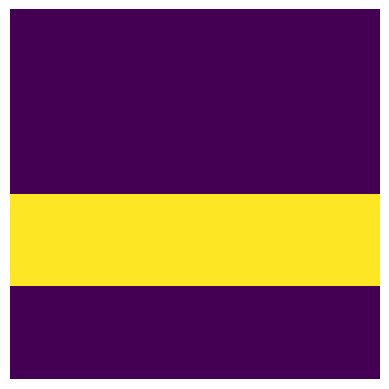

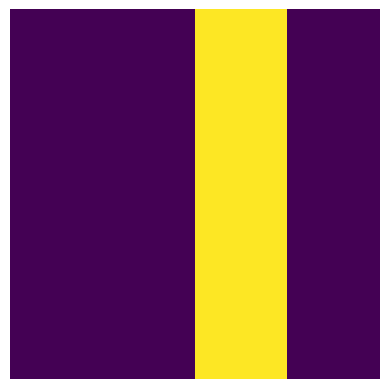

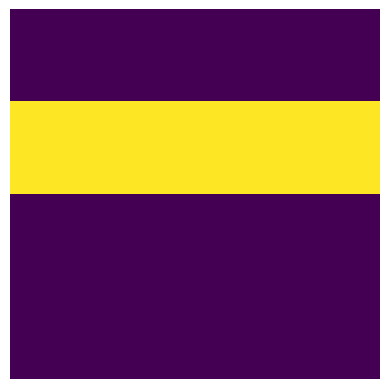

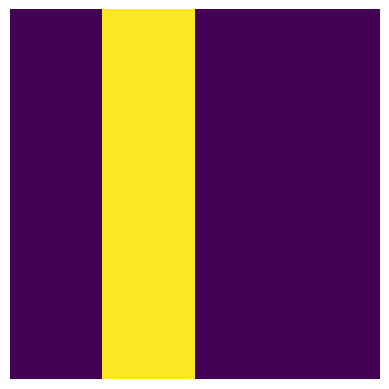

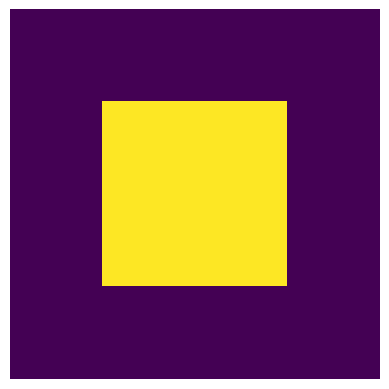

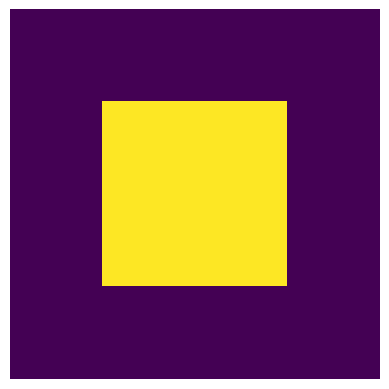

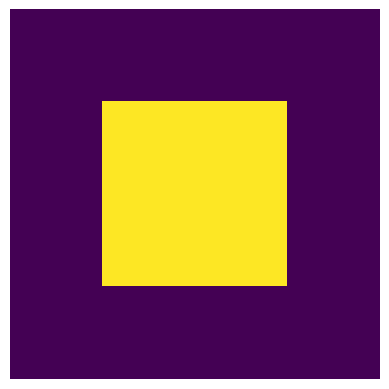

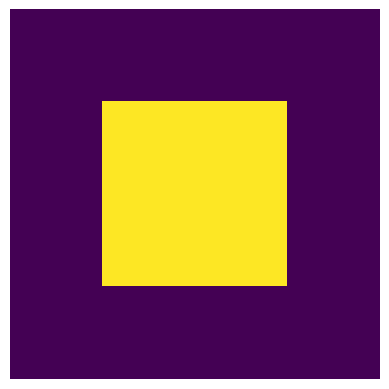

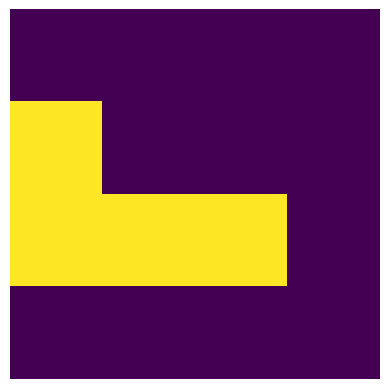

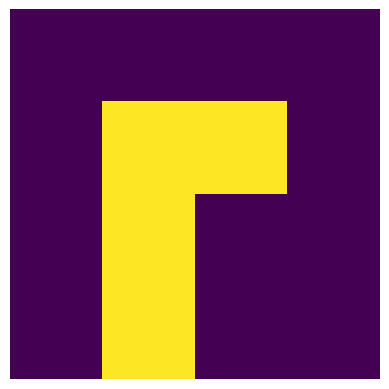

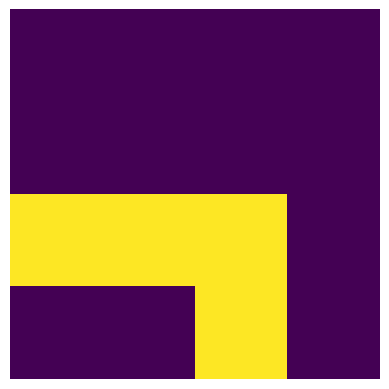

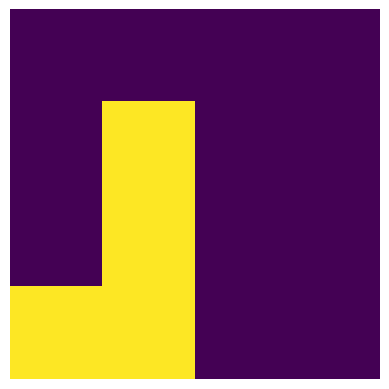

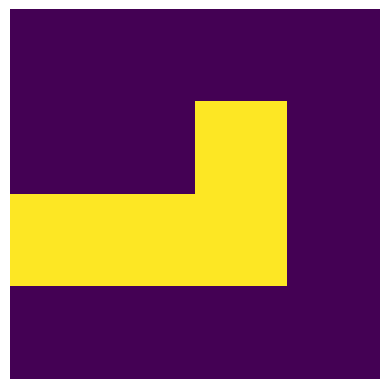

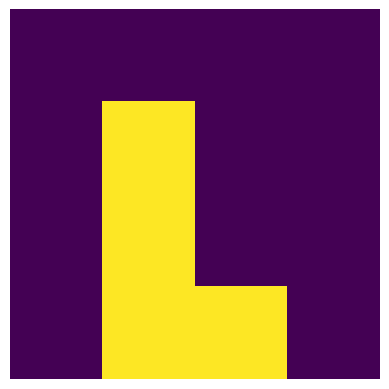

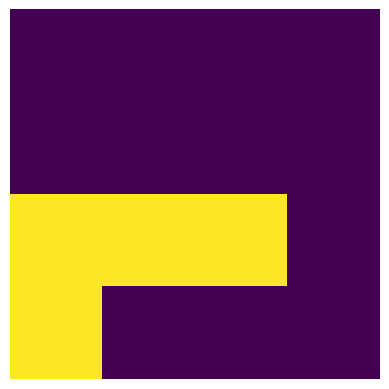

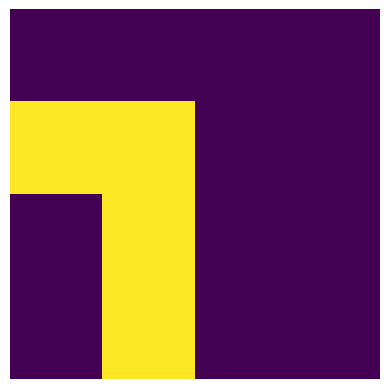

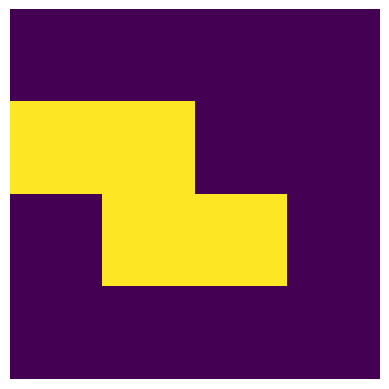

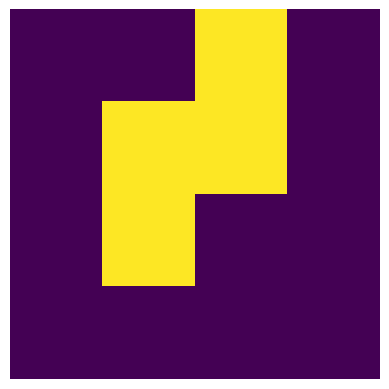

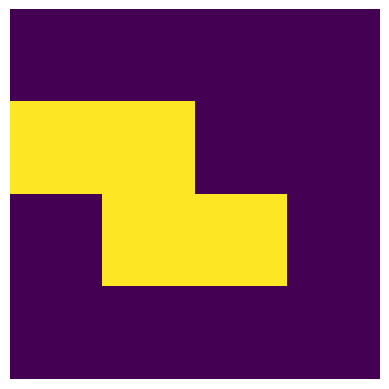

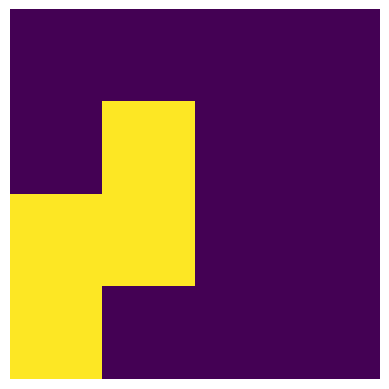

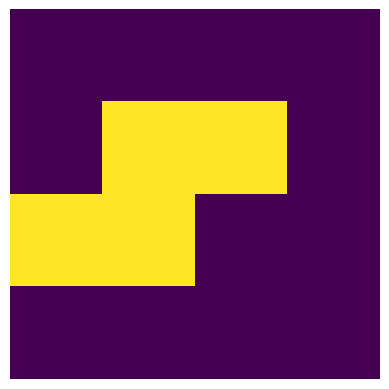

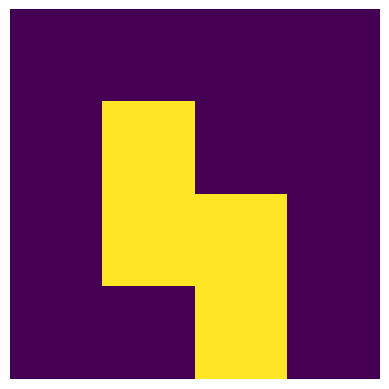

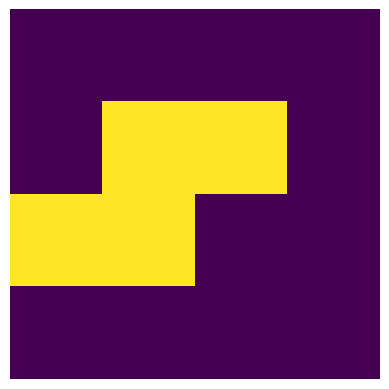

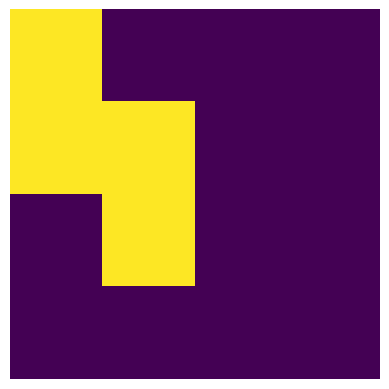

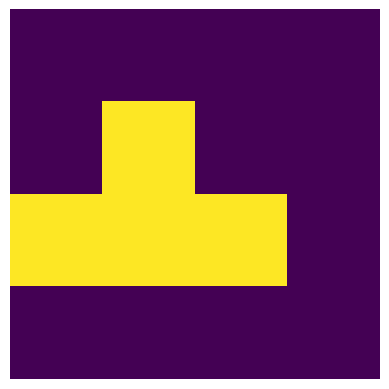

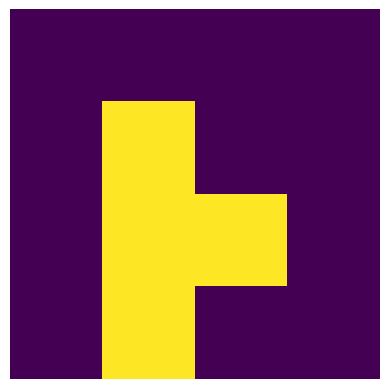

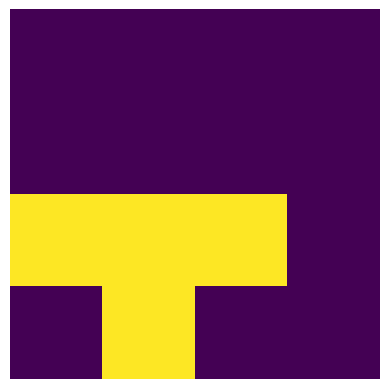

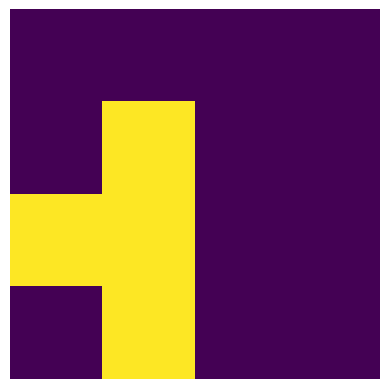

In [15]:
# get piece from matrix 2d
list_block_match = []
def print_block(block):
  plt.imshow(block)
  plt.axis('off')
  plt.show()
list_blocks = [ip, op, jp, lp, zp, sp, tp]
for i in range(len(list_blocks)):
  # each block in list block has 4 state rotate
  list_block_match.append(list_blocks[i][0])
  list_block_match.append(list_blocks[i][1])
  list_block_match.append(list_blocks[i][2])
  list_block_match.append(list_blocks[i][3])
print("has", len(list_block_match), "state match")
for i in range(len(list_block_match)):
  print_block(list_block_match[i])

In [16]:
# match block
def delay(tm):
  tm *= 10000
  while tm > 0:
    tm -= 1
def get_feasible(block):
  feasibles = []
  for x in range(4):
    for y in range(4):
      if block[x][y] > 0:
        feasibles.append([x, y])
  return feasibles
def match_block(feasibles_block, px, py, binary_matrix):
  # print("go use", px, py, feasibles_block)
  # print(binary_matrix)
  for i in range(len(feasibles_block)):
    b_x = feasibles_block[i][0]
    b_y = feasibles_block[i][1]
    if b_x + px < 0 or b_x + px >= 20 or b_y + py < 0 or b_y + py >= 10:
      return False
    if binary_matrix[b_x + px][b_y + py] == 0:
      return False
  return True
def maybe_error(feasibles_block, px, py, binary_matrix):
  binary_matrix_check = np.copy(binary_matrix)
  for i in range(len(feasibles_block)):
    b_x = feasibles_block[i][0]
    b_y = feasibles_block[i][1]
    binary_matrix_check[b_x + px][b_y + py] = 0
  for i in range(len(binary_matrix_check)):
    for j in range(len(binary_matrix_check[0])):
      if binary_matrix_check[i][j] != 0:
        return True
  return False
def location_block_in_binary_matrix(block, binary_matrix):
  feasibles = get_feasible(block)
  for i in range(-2, len(binary_matrix) + 2):
    for j in range(-2, len(binary_matrix[0]) + 2):
      if match_block(feasibles, i, j, binary_matrix) == True:
        if not maybe_error(feasibles, i, j, binary_matrix):
          # print("new success")
          return i, j, True
  return -10, -10, False
def check_drop(location_x, location_y, id, binary_matrix):
  feasibles = get_feasible(list_block_match[id])
  binary_matrix_check = np.copy(binary_matrix)
  for i in range(len(feasibles)):
    binary_matrix_check[location_x + feasibles[i][0]][location_y + feasibles[i][1]] = 0

  for i in range(len(feasibles)):
    if binary_matrix_check[location_x - 1 + feasibles[i][0]][location_y + feasibles[i][1]] != 0:
      return False
  return True
# start mapping block for this
location_block_mapping = []
start_binary_matrix = np.zeros((20, 10), dtype=np.int32)
for i in range(0, len(new_clean_data), 2):
  diff_location = compare_matrix(start_binary_matrix, new_clean_data[i + 1][0])
  show_diff_matrix = np.zeros((20, 10), dtype=np.int32)
  for (l_i, l_j) in diff_location:
    show_diff_matrix[l_i, l_j] = 200
  start_binary_matrix = resolve_matrix(new_clean_data[i + 1][0])[0]
  # check each block in block lists
  check_success = False
  for j in range(len(list_block_match)):
    location_x, location_y, match_success = location_block_in_binary_matrix(list_block_match[j], show_diff_matrix)
    if match_success:
      if check_drop(location_x, location_y, j, new_clean_data[i + 1][0]) == True:
        location_block_mapping.append((location_x, location_y, j))
        check_success = True
        break
  if check_success == False:
    location_block_mapping.append((-10, -10, -1))
print(location_block_mapping)
print("len location matrix: ", len(location_block_mapping))
print("len new clean data: ", len(new_clean_data))

# start mapping block for friend
location_block_mapping_friend = []
start_binary_matrix = np.zeros((20, 10), dtype=np.int32)
for i in range(0, len(new_clean_data_friend), 2):
  diff_location = compare_matrix(start_binary_matrix, new_clean_data_friend[i + 1][0])
  show_diff_matrix = np.zeros((20, 10), dtype=np.int32)
  for (l_i, l_j) in diff_location:
    show_diff_matrix[l_i, l_j] = 200
  start_binary_matrix = resolve_matrix(new_clean_data_friend[i + 1][0])[0]
  # check each block in block lists
  check_success = False
  for j in range(len(list_block_match)):
    location_x, location_y, match_success = location_block_in_binary_matrix(list_block_match[j], show_diff_matrix)
    if match_success:
      if check_drop(location_x, location_y, j, new_clean_data_friend[i + 1][0]) == True:
        location_block_mapping_friend.append((location_x, location_y, j))
        check_success = True
        break
  if check_success == False:
    location_block_mapping_friend.append((-10, -10, -1))
print(location_block_mapping_friend)
print("len location matrix: ", len(location_block_mapping_friend))
print("len new clean data: ", len(new_clean_data_friend))

[(17, 6, 24), (17, 0, 8), (16, 0, 16), (17, 3, 8), (16, 4, 12), (14, -1, 4), (15, 2, 0), (15, 7, 27), (14, 2, 8), (14, 5, 12), (13, 4, 24), (12, 0, 8), (16, 7, 1), (16, 2, 15), (14, 0, 26), (16, 3, 17), (16, 5, 4), (16, 7, 25), (15, 2, 16), (15, 6, 24), (14, 3, 16), (14, -1, 4), (12, 0, 10), (14, 5, 17), (12, 4, 26), (13, 6, 1), (11, 1, 10), (11, 3, 4), (16, 7, 1), (14, 0, 14), (14, 2, 17), (13, 0, 8), (12, 1, 24), (15, 6, 20), (13, 5, 26), (16, 7, 1), (15, 0, 20), (13, -2, 1), (16, 4, 16), (16, 7, 8), (15, 4, 21), (15, 2, 25), (14, 3, 17), (16, 7, 25), (16, 6, 17), (14, 4, 1), (15, 1, 20), (11, -2, 1), (13, 2, 4), (13, 7, 10), (13, -1, 1), (11, 3, 21), (9, 0, 15), (12, 7, 24), (6, -1, 13), (10, 8, 27), (12, 1, 9), (11, 1, 13), (12, 4, 21), (13, 5, 1), (14, 5, 17), (13, 7, 9), (14, 2, 4), (9, -2, 1), (13, 2, 12), (13, 4, 25), (16, 7, 1), (17, 0, 4), (16, 2, 25), (15, 0, 4), (17, 5, 16), (16, 7, 27), (13, 1, 10), (15, 6, 20), (15, 3, 4), (13, 4, 21), (12, 1, 12), (12, 3, 9), (10, -1, 13

finally we have piece use each image depend detect piece

In [17]:
# get piece from 2 states for this
start_binary_matrix = np.zeros((20, 10), dtype=np.int32)
for i in range(0, len(new_clean_data), 2):
  diff_location = compare_matrix(start_binary_matrix, new_clean_data[i + 1][0])
  show_diff_matrix = np.zeros((20, 10), dtype=np.int32)
  for (l_i, l_j) in diff_location:
    show_diff_matrix[l_i, l_j] = 200
  start_binary_matrix = resolve_matrix(new_clean_data[i + 1][0])[0]
  print("location: ", i, new_clean_data[i][2], location_block_mapping[i // 2])
  fig, axs = plt.subplots(1, 4, figsize=(5, 5))
  axs[0].imshow(new_clean_data[i][0])
  axs[0].axis('off')
  axs[1].imshow(new_clean_data[i + 1][0])
  axs[1].axis('off')
  axs[2].imshow(show_diff_matrix)
  axs[2].axis('off')
  axs[3].imshow(new_clean_data[i][1])
  axs[3].axis('off')
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [18]:
# get piece from 2 states for friend
start_binary_matrix = np.zeros((20, 10), dtype=np.int32)
for i in range(0, len(new_clean_data_friend), 2):
  diff_location = compare_matrix(start_binary_matrix, new_clean_data_friend[i + 1][0])
  show_diff_matrix = np.zeros((20, 10), dtype=np.int32)
  for (l_i, l_j) in diff_location:
    show_diff_matrix[l_i, l_j] = 200
  start_binary_matrix = resolve_matrix(new_clean_data_friend[i + 1][0])[0]
  print("location: ", i, new_clean_data_friend[i][2], location_block_mapping_friend[i // 2])
  fig, axs = plt.subplots(1, 4, figsize=(5, 5))
  axs[0].imshow(new_clean_data_friend[i][0])
  axs[0].axis('off')
  axs[1].imshow(new_clean_data_friend[i + 1][0])
  axs[1].axis('off')
  axs[2].imshow(show_diff_matrix)
  axs[2].axis('off')
  axs[3].imshow(new_clean_data_friend[i][1])
  axs[3].axis('off')
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

save again dataset before merger

In [19]:
# save dataset
dataset_save = []
label_save = []
start_binary_matrix = np.zeros((20, 10), dtype=np.int32)
for i in range(0, len(new_clean_data), 2):
  if location_block_mapping[i // 2] != (-10, -10, -1):
    dataset_save.append(start_binary_matrix)
    label_save.append(location_block_mapping[i // 2])
  start_binary_matrix = resolve_matrix(new_clean_data[i + 1][0])[0]
# dataset_save = np.array(dataset_save)
# label_save = np.array(label_save)
print("dataset and label one video for this: ", len(dataset_save), len(label_save))

# save dataset for friend
dataset_save_friend = []
label_save_friend = []
start_binary_matrix = np.zeros((20, 10), dtype=np.int32)
for i in range(0, len(new_clean_data_friend), 2):
  if location_block_mapping_friend[i // 2] != (-10, -10, -1):
    dataset_save_friend.append(start_binary_matrix)
    label_save_friend.append(location_block_mapping_friend[i // 2])
  start_binary_matrix = resolve_matrix(new_clean_data_friend[i + 1][0])[0]
# dataset_save_friend = np.array(dataset_save_friend)
# label_save_friend = np.array(label_save_friend)
print("dataset and label one video for this: ", len(dataset_save_friend), len(label_save_friend))

dataset and label one video for this:  511 511
dataset and label one video for this:  510 510


merger dataset from 2 player

In [20]:
# merger data set from this and friend
dataset_save.pop()
label_save.pop()
for i in range(len(dataset_save_friend) - 1):
  dataset_save.append(dataset_save_friend[i])
  label_save.append(label_save_friend[i])
dataset_save = np.array(dataset_save)
label_save = np.array(label_save)
print("len all dataset after merger:", len(label_save))

len all dataset after merger: 1019


Conver image 20x10 to 20 x 20 and in image(20 x 20) we have stacked pieces and The prepared piece is used

In [21]:
def preprocess_input(binary_matrix, label_id):
  # padding left 5 unit and padding right 5 unit
  padding = 5
  new_binary_matrix = np.zeros((20, 20), dtype=np.int32)
  for i in range(len(binary_matrix)):
    for j in range(len(binary_matrix[0])):
      new_binary_matrix[i][padding + j] = binary_matrix[i][j]
  # add block in new binary matrix
  feasibles = get_feasible(list_block_match[label_id // 4 * 4])
  if label_id >= 0 and label_id <= 3: # piece I
    for i in range(len(feasibles)):
      new_binary_matrix[-2 + feasibles[i][0]][feasibles[i][1]] = 200
  elif label_id >= 4 and label_id <= 7: # piece O
    for i in range(len(feasibles)):
      new_binary_matrix[14 + feasibles[i][0]][feasibles[i][1]] = 200
  elif label_id >= 8 and label_id <= 11: # piece J
    for i in range(len(feasibles)):
      new_binary_matrix[4 + feasibles[i][0]][feasibles[i][1]] = 200
  elif label_id >= 12 and label_id <= 15: # piece L
    for i in range(len(feasibles)):
      new_binary_matrix[9 + feasibles[i][0]][feasibles[i][1]] = 200
  elif label_id >= 16 and label_id <= 19: # piece Z
    for i in range(len(feasibles)):
      new_binary_matrix[9 + feasibles[i][0]][17 + feasibles[i][1]] = 200
  elif label_id >= 20 and label_id <= 23: # piece S
    for i in range(len(feasibles)):
      new_binary_matrix[-1 + feasibles[i][0]][17 + feasibles[i][1]] = 200
  elif label_id >= 24 and label_id <= 27: # piece T
    for i in range(len(feasibles)):
      new_binary_matrix[4 + feasibles[i][0]][17 + feasibles[i][1]] = 200
  print_block(new_binary_matrix)
  return new_binary_matrix
dataset_train = []
label_train = []
for i in range(len(dataset_save)):
  print("counter: ", i)
  input_train = preprocess_input(dataset_save[i], label_save[i][2])
  dataset_train.append(input_train)
  label_train.append(label_save[i])

Output hidden; open in https://colab.research.google.com to view.

normalize image(20 x 20) to binary matrix (20 x 20)

In [22]:
# normalize dataset
def normalize_data(binary_matrix):
  for i in range(len(binary_matrix)):
    for j in range(len(binary_matrix[0])):
      if binary_matrix[i][j] != 0:
        binary_matrix[i][j] = 1
  return binary_matrix
for i in range(len(dataset_train)):
  dataset_train[i] = normalize_data(dataset_train[i])

save data to folder a including dataset folder and label

In [23]:
# data_directory = '/content/drive/MyDrive/Colab Notebooks/data/dataset27/'
# labels_directory = '/content/drive/MyDrive/Colab Notebooks/data/label27/'
# os.makedirs(data_directory, exist_ok=True)
# os.makedirs(labels_directory, exist_ok=True)

# # save data
# for i in range(len(dataset_train)):
#     # save input by file .txt
#     matrix_path = os.path.join(data_directory, f'state_{i}.txt')
#     np.savetxt(matrix_path, dataset_train[i], fmt='%d')
#     # save label in file .txt
#     label_path = os.path.join(labels_directory, f'label_{i}.txt')
#     with open(label_path, 'w') as f:
#         f.write(f"{label_train[i][0]}, {label_train[i][1]}, {label_train[i][2]}\n")